In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np                     
import matplotlib.pyplot as plt
import os
import cv2 as cv
import random
import torch
# import torchvision
import glob
import time 
import pickle
import pandas as pd
from pathlib import Path
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import h5py
from typing import Tuple, List
from keras.callbacks import History
from keras.engine import training
from pathlib import Path
import json
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import img_to_array
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.framework.ops import Tensor
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average
from keras.engine import training
from tensorflow.keras.layers import Input
from keras.models import Model
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import math  
import datetime
import time
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import load_img
print('done loading')

done loading


In [ ]:
NUM_EPOCHS = 50
BS=45
path = 'D:\Autism\Create_LoginPage-main\Data'

In [ ]:
def folders_in_path(path): #takes path as input
    if not Path.is_dir(path): #checks if path exsist
        raise ValueError("argument is not directory") #produses error
        #if not in directory
    yield from filter(Path.is_dir,path.iterdir())
def folders_in_depth(path,depth):
    if 0>depth:
        raise ValueError("depth smaller 0")
    if 0==depth:
        yield from folders_in_path(path)
    else:
        for folder in folders_in_path(path):
            yield from folders_in_depth(folder,depth-1)
def files_in_path(path):
    if not Path.is_dir(path):
        raise ValueError("argument is not a directory")
    yield from filter(Path.is_file,path.iterdir())
def sum_file_size(filepaths):
    return sum([filep.stat().st_size for filep in filepaths])
def convert_image_to_array(image_dir):
    try:
        image = cv.imread(image_dir)
        if image is not None :
            image = cv.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None 
  

In [5]:
def load_train(path):
    images = []
    for label in labels:
        direc = os.path.join(path, label)
        class_num = labels.index(label)
        for image in os.listdir(direc):
            image_read = cv.imread(os.path.join(direc,image),cv.IMREAD_GRAYSCALE)
            image_resized = cv.resize(image_read,(image_size,image_size))
            images.append([image_resized,class_num])
            
    return np.array(images)
 

In [6]:
# looking into complete folder to understand number of images 
train = os.listdir(path)
folders=[]
folders = [f for f in sorted(os.listdir(path))]
print(folders)
labels = folders
print (f'The labels are {labels}')
image_size = 256
train_images = load_train(path)
X = []
y = []
for feature, label in train_images:
    X.append(feature)
    y.append(label)
print('Done loading all images')    
print (f'Length of X = {len(X)}')
print (f'Length of y = {len(y)}')
## checking the number of images of each class
a = 0
b = 0
for label in y:
   if label == 0:
        a += 1
   if label == 1:
       b += 1
 



['Autistic', 'Non_Autistic']
The labels are ['Autistic', 'Non_Autistic']
Done loading all images
Length of X = 2897
Length of y = 2897


In [7]:
train_path=path
EPOCHS = 50 #50
INIT_LR = 1e-3
BS = 44
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3

In [8]:
image_list, label_list = [], []
train_labels=os.listdir(train_path) #take training path labels
train_labels.sort() #sort the labels
print(train_labels) #primt the lables
global_features=[] #initialize variable to combine all features
labels=[] #create label variables so as to decode text to number
total=0 #initialize
tot_file=[] #initialize
count=1 #start count to check number of images
i=0
j=0
k=0
print(Path.cwd()) #gives the current path

['Autistic', 'Non_Autistic']
D:\Autism


In [9]:
for folder in folders_in_depth(Path.cwd(),1):
        #first loop will pick the first foldend then next folder
        files=list(files_in_path(folder)) #list all files in folder
        file=len(files) #length of files
        tot_file.append(file) #because we are running for all folder
        # we are appending all files in tot_file at the end we
        #shall get the list of number of files in the folder
        #we are doing this because every folder has different number of files
        #at the end when we are trainig all class of disease have to be
        #trained equally, hence find the least number of images in the folder
        #and then train accordingly
        total_size=sum_file_size(files)
        #total size of files
        count=count+1 #check total number of files executed
        print(f'{folder}:filecount:{len(files)},total size:{total_size}')

D:\Autism\Data\Autistic:filecount:1442,total size:44345100
D:\Autism\Data\Non_Autistic:filecount:1455,total size:51608322
D:\Autism\logs\train:filecount:5,total size:663710
D:\Autism\logs\validation:filecount:4,total size:9609


In [10]:
tot_file.sort() #sort files based on ascending order
num=590#tot_file[2] #Index 0 is junkhence extract index 1
print('tOTAL FILE:',tot_file)
print(num) 

tOTAL FILE: [4, 5, 1442, 1455]
590


In [11]:
images_per_class=1442 #consider number of images per class
count=0   

In [12]:
train_path+'\\'+train_labels[1]

'D:\\Autism\\Data\\Non_Autistic'

In [13]:
for count in range(0,len(train_labels)):
   
    tr_name=count
    
    dir=train_path+'\\'+train_labels[tr_name]
    current_label=train_labels[tr_name]
    if current_label=='Non_Autistic':
        label= [1]
    else:
        label= [0]
    print("[STATUS] processed folder: {}".format(current_label))
    k=1
    file_sub_folder=os.listdir(dir) 
    for x in range(0,images_per_class):
        file=dir +'\\'+ file_sub_folder[x]
  
        image_list.append(convert_image_to_array(file ))
        label_list.append(label) 
        i+=1
        k+=1    
        count=count+1
print("[STATUS] training labels{}".format(np.array(label_list).shape))
print(label_list)

[STATUS] processed folder: Autistic
[STATUS] processed folder: Non_Autistic
[STATUS] training labels(2884, 1)
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],

In [14]:
from keras.utils.np_utils import to_categorical
print(label_list)
Y_train = to_categorical(np.array(label_list), num_classes= 2)


[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],

In [15]:
n_classes = 2
print(n_classes)

2


In [16]:
n_classes = 2
 
print(n_classes)
print(Y_train)

2
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [17]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print("[INFO] Spliting data to train, test")

x_train, x_test, y_train, y_test = train_test_split(np_image_list, Y_train, test_size=0.2, random_state = 42) 
inputShape = (height, width, depth)
print(x_train.shape)
print(y_train)

[INFO] Spliting data to train, test
(2307, 256, 256, 3)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [18]:

input_shape = x_train[0,:,:,:].shape
model_input = Input(shape=input_shape)
CONV_POOL_CNN_WEIGHT_FILE = os.path.join(os.getcwd(), 'weights', 'conv_pool_cnn_pretrained_weights.hdf5')
ALL_CNN_WEIGHT_FILE = os.path.join(os.getcwd(), 'weights', 'convolution_net_pretrained_weights.hdf5') # All convolution net 
NIN_CNN_WEIGHT_FILE = os.path.join(os.getcwd(), 'weights', 'network_in_network_pretrained_weights.hdf5')# NEtwork in Network 

In [19]:
def conv_pool_cnn(model_input: Tensor) -> training.Model:

    x = Conv2D(16, kernel_size=(3, 3), activation='relu', padding = 'same')(model_input)
    x = Conv2D(16, (3, 3), activation='relu', padding = 'same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding = 'same')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides = 2)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding = 'same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding = 'same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding = 'same')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides = 2)(x)
    x = Conv2D(128, (3, 3), activation='relu', padding = 'same')(x)
    x = Conv2D(128, (1, 1), activation='relu')(x)
    x = Conv2D(2, (1, 1))(x)
    x = GlobalAveragePooling2D()(x)
    x = Activation(activation='softmax')(x)
    
    
    model = Model(model_input, x, name='conv_pool_cnn')
    
    return model
#All convolution net 
def all_cnn(model_input: Tensor) -> training.Model:
    
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'same')(model_input)
    x = Conv2D(32, (3, 3), activation='relu', padding = 'same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding = 'same', strides = 2)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding = 'same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding = 'same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding = 'same', strides = 2)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding = 'same')(x)
    x = Conv2D(64, (1, 1), activation='relu')(x)
    x = Conv2D(2, (1, 1))(x)
    x = GlobalAveragePooling2D()(x)
    x = Activation(activation='softmax')(x)
        
    model = Model(model_input, x, name='all_cnn')
    
    return model
def nin_cnn(model_input: Tensor) -> training.Model:
    
    #mlpconv block 1
    x = Conv2D(32, (5, 5), activation='relu',padding='valid')(model_input)
    x = Conv2D(32, (1, 1), activation='relu')(x)
    x = Conv2D(32, (1, 1), activation='relu')(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.5)(x)
    
    #mlpconv block2
    x = Conv2D(64, (3, 3), activation='relu',padding='valid')(x)
    x = Conv2D(64, (1, 1), activation='relu')(x)
    x = Conv2D(64, (1, 1), activation='relu')(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.5)(x)
    
    #mlpconv block3
    x = Conv2D(128, (3, 3), activation='relu',padding='valid')(x)
    x = Conv2D(32, (1, 1), activation='relu')(x)
    x = Conv2D(2, (1, 1))(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Activation(activation='softmax')(x)
    
    model = Model(model_input, x, name='nin_cnn')
    
    return model
 

def ensemble(models: List [training.Model], model_input: Tensor) -> training.Model:
    
    outputs = [model.outputs[0] for model in models]
    y = Average()(outputs)
    
    model = Model(model_input, y, name='ensemble')
    
    return model

def compile_and_train(model: training.Model, num_epochs: int) -> Tuple [History, str]: 
    
    model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['acc']) 
    filepath = 'weights/' + model.name + '.{epoch:02d}-{loss:.2f}.hdf5'
    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=0, save_weights_only=True,
                                                 save_best_only=True, mode='auto', period=1)
    tensor_board = TensorBoard(log_dir='logs/', histogram_freq=0, batch_size=BS)
    history = model.fit(x=x_train, y=y_train, batch_size=BS, 
                     epochs=num_epochs, verbose=1, callbacks=[checkpoint, tensor_board], validation_split=0.2)
    weight_files = glob.glob(os.path.join(os.getcwd(), 'weights/*'))
    weight_file = max(weight_files, key=os.path.getctime) # most recent file
    return history, weight_file

In [20]:
conv_pool_cnn_model = conv_pool_cnn(model_input)
_, conv_pool_cnn_weight_file = compile_and_train(conv_pool_cnn_model, NUM_EPOCHS)

Epoch 1/50
42/42 [==============================] - 183s 4s/step - loss: 0.6987 - acc: 0.5241 - val_loss: 0.6886 - val_acc: 0.5433
Epoch 2/50
42/42 [==============================] - 222s 5s/step - loss: 0.6937 - acc: 0.4851 - val_loss: 0.6930 - val_acc: 0.5216
Epoch 3/50
42/42 [==============================] - 225s 5s/step - loss: 0.6935 - acc: 0.4992 - val_loss: 0.6928 - val_acc: 0.6342
Epoch 4/50
42/42 [==============================] - 212s 5s/step - loss: 0.6890 - acc: 0.5480 - val_loss: 0.6843 - val_acc: 0.5541
Epoch 5/50
42/42 [==============================] - 212s 5s/step - loss: 0.6796 - acc: 0.5518 - val_loss: 0.6672 - val_acc: 0.5606
Epoch 6/50
42/42 [==============================] - 211s 5s/step - loss: 0.6779 - acc: 0.5729 - val_loss: 0.6841 - val_acc: 0.6364
Epoch 7/50
42/42 [==============================] - 208s 5s/step - loss: 0.6592 - acc: 0.6108 - val_loss: 0.6630 - val_acc: 0.6515
Epoch 8/50
42/42 [==============================] - 208s 5s/step - loss: 0.6664 - a

In [21]:
all_cnn_model = all_cnn(model_input)
_, all_cnn_weight_file = compile_and_train(all_cnn_model, NUM_EPOCHS)

Epoch 1/50
42/42 [==============================] - 205s 5s/step - loss: 0.6933 - acc: 0.5008 - val_loss: 0.6889 - val_acc: 0.5195
Epoch 2/50
42/42 [==============================] - 211s 5s/step - loss: 0.6927 - acc: 0.5030 - val_loss: 0.6883 - val_acc: 0.4805
Epoch 3/50
42/42 [==============================] - 211s 5s/step - loss: 0.6911 - acc: 0.5127 - val_loss: 0.6920 - val_acc: 0.5216
Epoch 4/50
42/42 [==============================] - 219s 5s/step - loss: 0.6936 - acc: 0.4818 - val_loss: 0.6926 - val_acc: 0.5216
Epoch 5/50
42/42 [==============================] - 217s 5s/step - loss: 0.6932 - acc: 0.5106 - val_loss: 0.6922 - val_acc: 0.5952
Epoch 6/50
42/42 [==============================] - 217s 5s/step - loss: 0.6920 - acc: 0.5355 - val_loss: 0.6908 - val_acc: 0.5887
Epoch 7/50
42/42 [==============================] - 219s 5s/step - loss: 0.6810 - acc: 0.5816 - val_loss: 0.6751 - val_acc: 0.6364
Epoch 8/50
42/42 [==============================] - 216s 5s/step - loss: 0.6621 - a

In [22]:
#Network In Network CNN
nin_cnn_model = nin_cnn(model_input)
_, nin_cnn_weight_file = compile_and_train(nin_cnn_model, NUM_EPOCHS)

Epoch 1/50
42/42 [==============================] - 125s 3s/step - loss: 0.6935 - acc: 0.4997 - val_loss: 0.6888 - val_acc: 0.5216
Epoch 2/50
42/42 [==============================] - 127s 3s/step - loss: 0.6889 - acc: 0.5220 - val_loss: 0.6881 - val_acc: 0.5022
Epoch 3/50
42/42 [==============================] - 130s 3s/step - loss: 0.6796 - acc: 0.5854 - val_loss: 0.6762 - val_acc: 0.5498
Epoch 4/50
42/42 [==============================] - 129s 3s/step - loss: 0.6592 - acc: 0.6217 - val_loss: 0.7207 - val_acc: 0.5065
Epoch 5/50
42/42 [==============================] - 130s 3s/step - loss: 0.6545 - acc: 0.6043 - val_loss: 0.6590 - val_acc: 0.6472
Epoch 6/50
42/42 [==============================] - 127s 3s/step - loss: 0.6502 - acc: 0.6249 - val_loss: 0.6827 - val_acc: 0.5455
Epoch 7/50
42/42 [==============================] - 126s 3s/step - loss: 0.6532 - acc: 0.6060 - val_loss: 0.6518 - val_acc: 0.6623
Epoch 8/50
42/42 [==============================] - 127s 3s/step - loss: 0.6512 - a

In [23]:
conv_pool_cnn_model = conv_pool_cnn(model_input)
all_cnn_model = all_cnn(model_input)
nin_cnn_model = nin_cnn(model_input)

try:
    conv_pool_cnn_model.load_weights(conv_pool_cnn_weight_file)
except NameError:
    conv_pool_cnn_model.load_weights(CONV_POOL_CNN_WEIGHT_FILE)
try:
    all_cnn_model.load_weights(all_cnn_weight_file)
except NameError:
    all_cnn_model.load_weights(ALL_CNN_WEIGHT_FILE)
try:
    nin_cnn_model.load_weights(nin_cnn_weight_file)
except NameError:
    nin_cnn_model.load_weights(NIN_CNN_WEIGHT_FILE)


models = [conv_pool_cnn_model, all_cnn_model, nin_cnn_model]

In [24]:
ensemble_model = ensemble(models, model_input)

In [25]:
pool_cnn = [conv_pool_cnn_model, all_cnn_model]
pool_cnn_nn = [conv_pool_cnn_model, nin_cnn_model]
cnn_nn = [all_cnn_model, nin_cnn_model]
together_nn = [conv_pool_cnn_model,all_cnn_model, nin_cnn_model]

ensemble_model_01 = ensemble(pool_cnn, model_input)
ensemble_model_02 = ensemble(pool_cnn_nn, model_input)
ensemble_model_03 = ensemble(cnn_nn, model_input)
ensemble_model_04 = ensemble(together_nn, model_input)

In [26]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt ='.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

19/19 [==============================] - 21s 927ms/step
[[235  65]
 [ 72 205]]
76.25649913344887


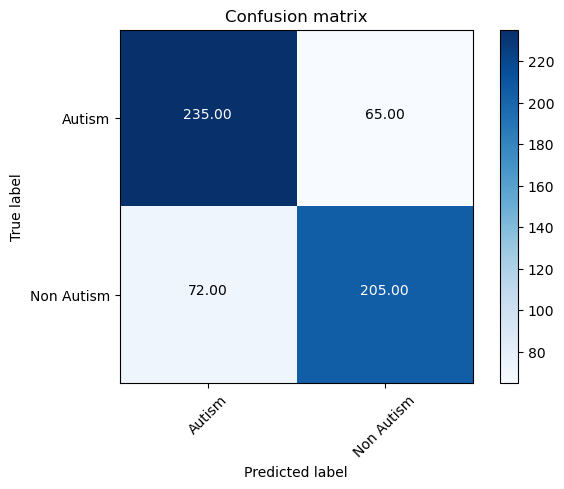

In [27]:
pred = ensemble_model_01.predict(x_test)
from sklearn.metrics import confusion_matrix
test_labels = pd.DataFrame(y_test).idxmax(axis=1)
predictions = pd.DataFrame(pred).idxmax(axis=1)
confusion_matrix= confusion_matrix(test_labels, predictions)
print(confusion_matrix)
plot_confusion_matrix(confusion_matrix,['Autism','Non Autism'],normalize=True)
print((confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])*100)

19/19 [==============================] - 16s 837ms/step
[[236  64]
 [ 84 193]]
74.35008665511266


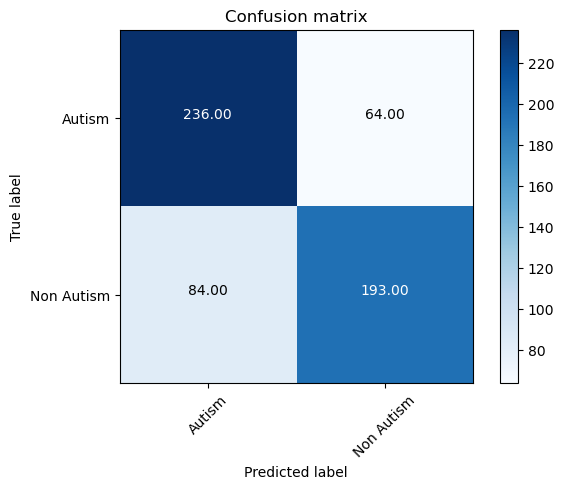

In [28]:
pred = ensemble_model_02.predict(x_test)
from sklearn.metrics import confusion_matrix
test_labels = pd.DataFrame(y_test).idxmax(axis=1)
predictions = pd.DataFrame(pred).idxmax(axis=1)
confusion_matrix= confusion_matrix(test_labels, predictions)
print(confusion_matrix)
plot_confusion_matrix(confusion_matrix,['Autism','Non Autism'],normalize=True)
print((confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])*100)

19/19 [==============================] - 16s 812ms/step
[[230  70]
 [ 83 194]]
73.48353552859619


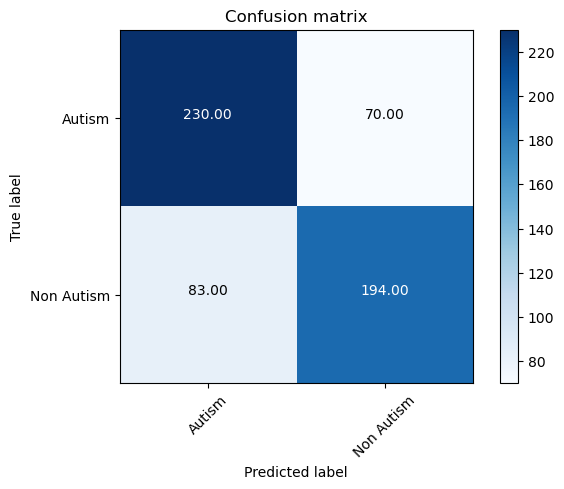

In [29]:
pred = ensemble_model_03.predict(x_test)
from sklearn.metrics import confusion_matrix
test_labels = pd.DataFrame(y_test).idxmax(axis=1)
predictions = pd.DataFrame(pred).idxmax(axis=1)
confusion_matrix= confusion_matrix(test_labels, predictions)
print(confusion_matrix)
plot_confusion_matrix(confusion_matrix,['Autism','Non Autism'],normalize=True)
print((confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])*100)

19/19 [==============================] - 26s 1s/step
[[236  64]
 [ 74 203]]
76.08318890814559


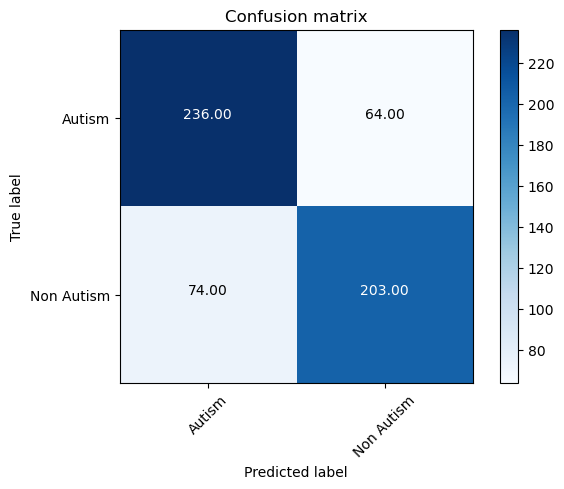

In [30]:
pred = ensemble_model_04.predict(x_test)
from sklearn.metrics import confusion_matrix
test_labels = pd.DataFrame(y_test).idxmax(axis=1)
predictions = pd.DataFrame(pred).idxmax(axis=1)
confusion_matrix= confusion_matrix(test_labels, predictions)
print(confusion_matrix)
plot_confusion_matrix(confusion_matrix,['Autism','Non Autism'],normalize=True)
print((confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])*100)

In [4]:
img_width, img_height = 224, 224  
   
#Create a bottleneck file
top_model_weights_path = 'autism_model.h5' 

# loading up our datasets
train_data_dir =path
validation_data_dir =path
test_data_dir = path
   
# number of epochs to train top model  
epochs = 7

# batch size used by flow_from_directory and predict_generator  
batch_size = 50  
vgg16 = applications.VGG16(include_top=False, weights='imagenet') 
datagen = ImageDataGenerator(rescale=1. / 255) 

In [139]:
#run this only once
start = datetime.datetime.now()

generator = datagen.flow_from_directory(
train_data_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode=None,
shuffle=False)

nb_train_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_train = int(math.ceil(nb_train_samples / batch_size))

bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)

np.save('autism_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 2897 images belonging to 2 classes.
Time:  0:11:41.023373


In [ ]:
#run this only once
start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg16.predict_generator(  
     generator, predict_size_validation)  
   
np.save('autism_features_validation.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

In [ ]:
#run this only once
start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
nb_test_samples = len(generator.filenames)  
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
bottleneck_features_test = vgg16.predict_generator(generator, predict_size_test)  
np.save('autism_features_test.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 2897 images belonging to 2 classes.


In [5]:
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('autism_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes) 

Found 2897 images belonging to 2 classes.


In [6]:
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('autism_features_test.npy')  
   
test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 2897 images belonging to 2 classes.


In [7]:
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('autism_features_validation.npy')  
   
validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)  

Found 2897 images belonging to 2 classes.


In [17]:
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=20,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/20
58/58 [==============================] - 2s 33ms/step - loss: 0.7461 - acc: 0.6317 - val_loss: 0.5709 - val_acc: 0.6959
Epoch 2/20
58/58 [==============================] - 2s 32ms/step - loss: 0.5578 - acc: 0.7308 - val_loss: 0.4263 - val_acc: 0.8060
Epoch 3/20
58/58 [==============================] - 2s 29ms/step - loss: 0.5037 - acc: 0.7649 - val_loss: 0.4482 - val_acc: 0.7767
Epoch 4/20
58/58 [==============================] - 2s 31ms/step - loss: 0.4823 - acc: 0.7729 - val_loss: 0.4041 - val_acc: 0.8164
Epoch 5/20
58/58 [==============================] - 2s 31ms/step - loss: 0.4457 - acc: 0.7929 - val_loss: 0.3698 - val_acc: 0.8319
Epoch 6/20
58/58 [==============================] - 2s 29ms/step - loss: 0.4382 - acc: 0.8022 - val_loss: 0.3399 - val_acc: 0.8536
Epoch 7/20
58/58 [==============================] - 2s 29ms/step - loss: 0.4052 - acc: 0.8240 - val_loss: 0.4449 - val_acc: 0.7767
Epoch 8/20
58/58 [==============================] - 2s 31ms/step - loss: 0.3692 - a

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 100)               2508900   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 2,514,052
Trainable params: 2,514,052
Non-

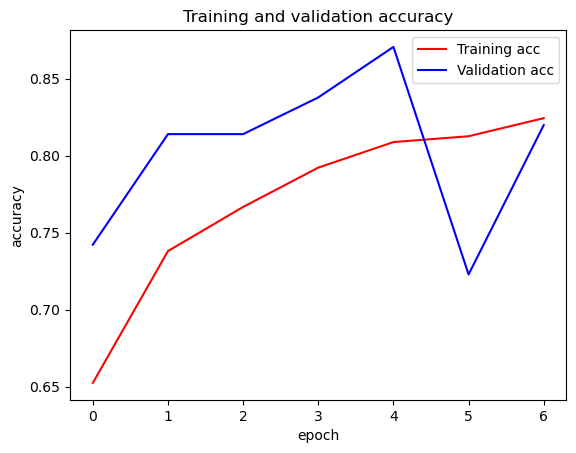

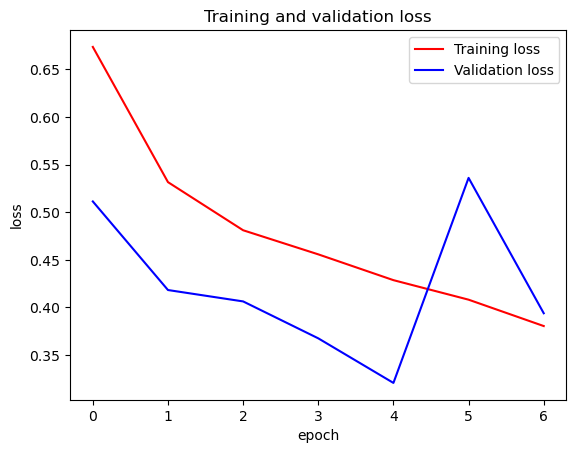

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [11]:
model.evaluate(test_data, test_labels)

91/91 [==============================] - 0s 4ms/step - loss: 0.3939 - acc: 0.8198


[0.39386528730392456, 0.81981360912323]

In [12]:
preds = np.round(model.predict(test_data),0) 
human = ['autism', 'non autism']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=human )
print(classification_metrics)

91/91 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

      autism       0.97      0.66      0.79      1442
  non autism       0.74      0.98      0.84      1455

   micro avg       0.82      0.82      0.82      2897
   macro avg       0.86      0.82      0.81      2897
weighted avg       0.85      0.82      0.82      2897
 samples avg       0.82      0.82      0.82      2897



In [16]:
print("Saving model...")
model.save("model.h5", include_optimizer=True)
vgg16.save("vgg16.h5", include_optimizer=True)

Saving model...


In [27]:
def test_single_image(path):
    human = ['autism', 'non autism']
    images=load_img(path, target_size=(228, 228))
    images = img_to_array(images)  
    images = np.expand_dims(images, axis=0)
    images /= 255.  
    time.sleep(.5)
    bt_prediction = vgg16.predict(images)  
    preds = model.predict(bt_prediction)
    
    ind = np.argmax(preds)
    for idx, human, x in zip(range(0,6), human , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, human, round(x*100,2) ))
     
    return ind,preds[0][ind]

In [29]:
path = 'D:\\Autism\\Data\Autistic\\0001.jpg'
ind,val=test_single_image(path)
print(ind)

1/1 [==============================] - 2s 2s/step
ID: 0, Label: autism 63.5%
ID: 1, Label: non autism 36.5%
0
